In [31]:
from sympy import *
init_printing()

In [32]:
A = IndexedBase('A')
t = IndexedBase('t')
zeta, omega = symbols("zeta omega")
omega_d = omega * sqrt(1 - zeta ** 2)
i = symbols("i", cls=Idx)
omega_e, zeta_e = symbols('omega_e zeta_e')

In [33]:
C = Sum(A[i] * exp(zeta * omega * t[i]) * cos(omega_d * t[i]), [i, 1, 3])
S = Sum(A[i] * exp(zeta * omega * t[i]) * sin(omega_d * t[i]), [i, 1, 3])

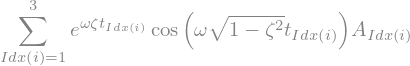

In [34]:
C

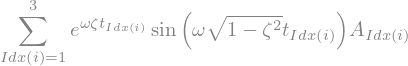

In [35]:
S

In [36]:
K = symbols('K')

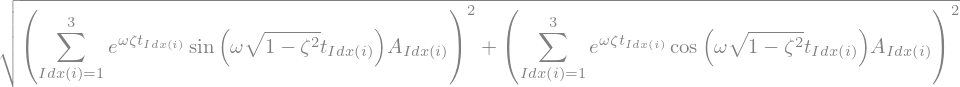

In [37]:
A_res = sqrt(C**2 + S**2)
A_res

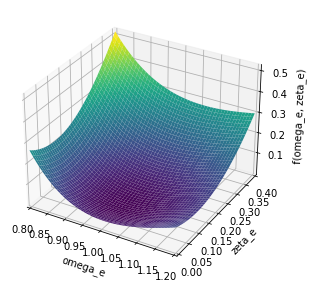

In [53]:
from sympy.plotting import plot, plot3d

def sensitivity(omega_error, zeta_fake):
    # omega_error = 1.1
    omega_m = omega_error * omega
    #zeta_m = zeta_error * zeta
    k_val = exp(zeta_fake * pi / sqrt(1 - zeta_fake ** 2))
    A_1 = (K**2 / (1 + K)**2).subs({K: k_val})
    A_2 = (2*K / (1 + K)**2).subs({K: k_val})
    A_3 = (1 / (1 + K)**2).subs({K: k_val})
    t_1 = 0
    t_2 = pi / (omega_m * sqrt(1 - zeta_fake**2))
    t_3 = 2 * pi / (omega_m * sqrt(1 - zeta_fake**2))
    return A_res.doit().subs({omega: 50, zeta: 0.1, t[1]: t_1, t[2]: t_2, t[3]: t_3, A[1]: A_1, A[2]: A_2, A[3]: A_3})#.evalf()

plot3d(sensitivity(omega_e, zeta_e), (omega_e, 0.8, 1.2), (zeta_e, 0, 0.4), show=True)

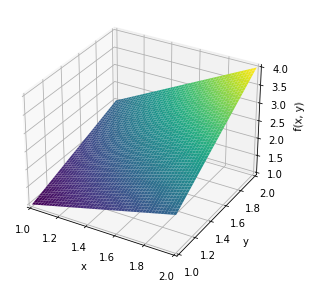

In [47]:
x, y = symbols("x y")
plot3d(x*y, (x, 1, 2), (y, 1, 2))